In [1]:
%run "Eigendecomposition_Source_Code.ipynb"

Loading: Eigendecomposition_Source_Code.ipynb...
Done at: 2023/08/17 18:28:16


In [14]:
import pickle
file1 = open('/home/jovyan/work/Human_Hippocampus/StitchedDataUpdated.pkl', 'rb')
stitched_data = pickle.load(file1)
file1.close()

new_data = read_phy_files('/home/jovyan/work/Human_Hippocampus/data/ephys/2023-05-10-e-hc52_18790_unperturbed/derived/kilosort2/hc5.2_chip18790_baseline_rec5.10.23_curated_s1.zip')
sds=[stitched_data, new_data]

file2 = open('/home/jovyan/work/Human_Hippocampus/Pairs_and_Lates_Directed.pkl', 'rb')
data = pickle.load(file2)
pairs_lates_dict = data["pairs_lates"]
file2.close()

/tmp/ipykernel_1870702/3606899937.py:6: DeprecationWarning: Call to deprecated function (or staticmethod) read_phy_files. (Prefer load_spike_data()) -- Deprecated since version 0.1.13.
  new_data = read_phy_files('/home/jovyan/work/Human_Hippocampus/data/ephys/2023-05-10-e-hc52_18790_unperturbed/derived/kilosort2/hc5.2_chip18790_baseline_rec5.10.23_curated_s1.zip')


In [3]:
pairs_lates_directed = pairs_lates_dict
from matplotlib.patches import FancyArrow

In [19]:
def EigenDirection(sd, selection):
    #corr = correlation(sd)
    sttc = get_sttc(sd)
    #Wcorr, Ucorr = eigenvalues_eigenvectors(corr)
    Wsttc, Usttc = eigenvalues_eigenvectors(sttc)
    
    neuron_x = []
    neuron_y = []
    
    for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array
        neuron_x.append(neuron['position'][0])

        neuron_y.append(neuron['position'][1])
        
    plt.figure(figsize=(7,5)) 
    ax = plt.axes()
    ax.set_facecolor("grey")
    
    
    plt.scatter(neuron_x,neuron_y, c=Usttc[:,selection], cmap = plot_color) # color each plotted neuron according to the values of the eigenvector
    """
    ####----------------------------------------------------------
    #
    # INSERT ARROW CODE HERE
    #
    ####----------------------------------------------------------
    
    direction_threshold = 0.65
    
    for pair, entries in pairs_lates_directed.items():
        lates_i = np.array(entries)

        if len(lates_i) == 0:
            continue

        percent_neg = np.sum(lates_i < 0) / len(lates_i)
        percent_pos = np.sum(lates_i > 0) / len(lates_i)

        # Check the direction and conditions
        is_pos = np.median(lates_i) > 0
        if is_pos and percent_pos > direction_threshold:
            start_i = pair[0]
            end_i = pair[1]

            arrow_color = "black"
            alpha_upd = 0
#             if neuron_y[start_i] < 500 or neuron_y[end_i] < 500:
#                 arrow_color = "lime"
#                 alpha_upd = 0.7

            if neuron_x[start_i] < neuron_x[end_i] and (neuron_y[start_i] > 500 or neuron_y[end_i] > 500):
                arrow_color = "r"
                alpha_upd = 0.7

            if neuron_x[start_i] > neuron_x[end_i] and (neuron_y[start_i] > 500 or neuron_y[end_i] > 500):
                arrow_color = "blue"
                alpha_upd = 0.7

            arrow = FancyArrow(
                neuron_x[end_i], neuron_y[end_i],
                neuron_x[start_i] - neuron_x[end_i], neuron_y[start_i] - neuron_y[end_i],
                length_includes_head=True, head_width=25,
                linewidth=1, color=arrow_color, alpha=alpha_upd, edgecolor=arrow_color, facecolor=arrow_color)
            plt.gca().add_patch(arrow)"""
    
    plt.xlabel('um')
    plt.ylabel('um')
    plt.colorbar(label="Eigen Component Value")
    plt.title("Eigenvector & Directionality")
    
    return

In [20]:
interact_manual(EigenDirection, sd=sds, selection=(0,10))

interactive(children=(Dropdown(description='sd', options=(<braingeneers.analysis.analysis.SpikeData object at …

<function __main__.EigenDirection(sd, selection)>

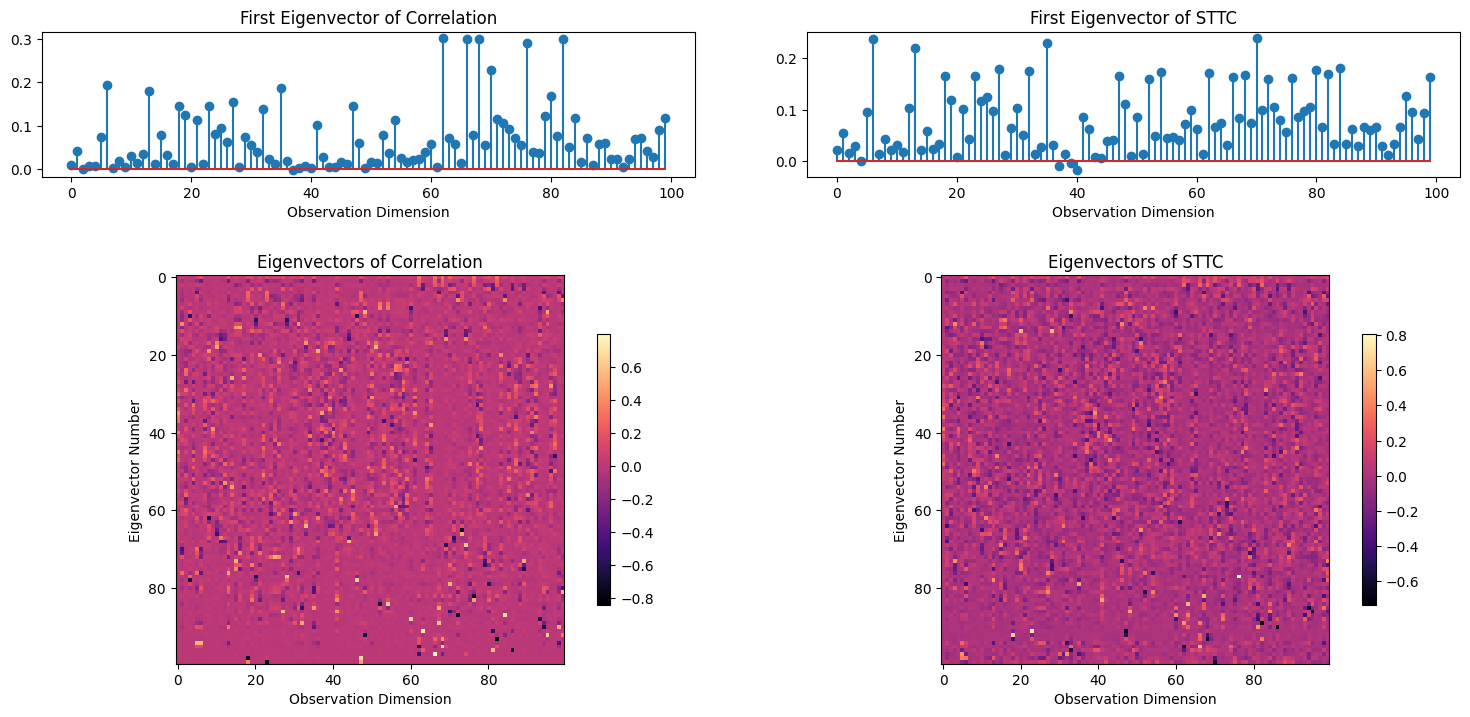

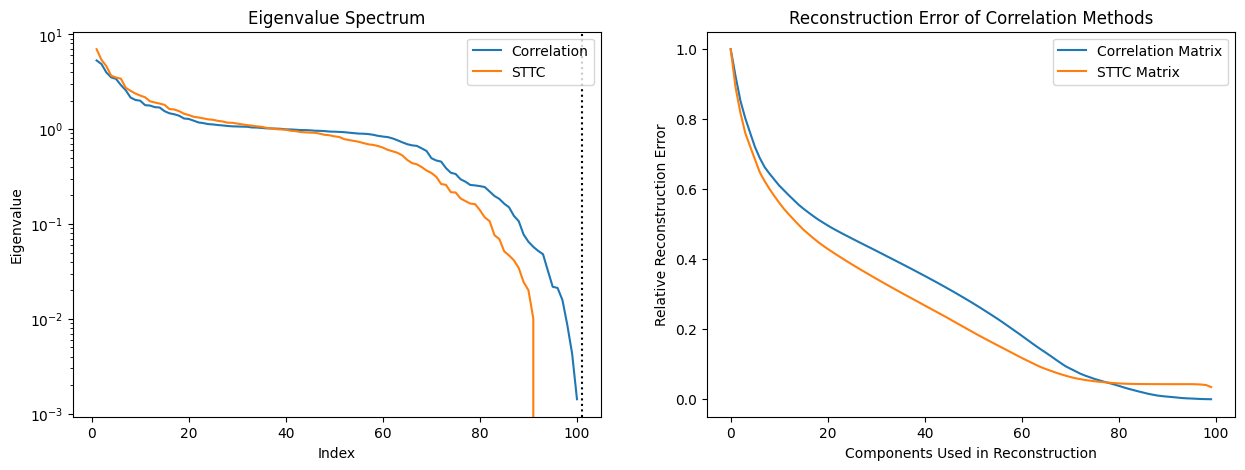

In [17]:
Corr = correlation(new_data)
STTC= get_sttc(new_data)
Wcorr, Ucorr = eigenvalues_eigenvectors(Corr)
Wsttc, Usttc = eigenvalues_eigenvectors(STTC)

EigenvectorAnalysis(Ucorr, Usttc)

ReconstructPlots(Wcorr, Wsttc, Corr, STTC)